# Image Denoising with Denosing Autoencoders
## Objective:
Build a denoising Autoencoder model to remove noise from corrupted images. Visually compare the denoised images with the original noisy ones. Analyze the effectiveness of the autoencoder in noise reduction.

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio

## Load and Preprocess the data

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Adding noise to the dataset

In [ ]:
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

noisy_train = add_noise(x_train)
noisy_test = add_noise(x_test)

## Building the Denoising Autoencoder Model

In [ ]:
def build_autoencoder():
    # Encoder
    input_img = Input(shape=(28, 28, 1))  # For grayscale images
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

    # Decoder
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

autoencoder = build_autoencoder()

## Training the Denoising Autoencoder

In [ ]:
autoencoder.fit(noisy_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(noisy_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.3476 - val_loss: 0.1158
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1147 - val_loss: 0.1096
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1098 - val_loss: 0.1074
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1075 - val_loss: 0.1057
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1064 - val_loss: 0.1044
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1050 - val_loss: 0.1035
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1040 - val_loss: 0.1027
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1032 - val_loss: 0.1023
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1026 - val_loss: 0.1014
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1020 - val_loss: 0.1010
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1016 - val_loss: 0.1006
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/s

## Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


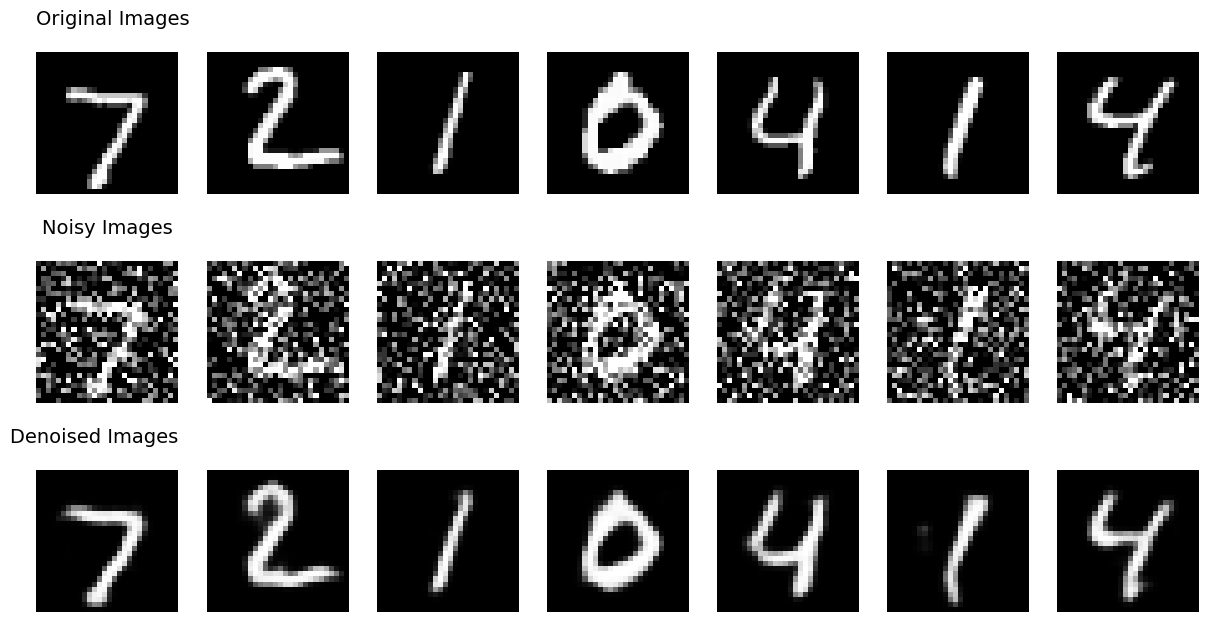

In [ ]:
# Predict denoised images
denoised_images = autoencoder.predict(noisy_test)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(3, 7, figsize=(15, 8))

# Add labels for each row
axs[0, 0].set_title('Original Images', loc='left', fontsize=14, pad=20)
axs[1, 0].set_title('Noisy Images', loc='center', fontsize=14, pad=20)
axs[2, 0].set_title('Denoised Images', loc='right', fontsize=14, pad=20)

for i in range(7):  # Display only 7 images
    # Display original images
    axs[0, i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axs[0, i].axis('off')

    # Display noisy images
    axs[1, i].imshow(noisy_test[i].reshape(28, 28), cmap='gray')
    axs[1, i].axis('off')

    # Display denoised images
    axs[2, i].imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    axs[2, i].axis('off')

plt.subplots_adjust(top=0.85)
plt.show()

In [ ]:
psnr_values = [peak_signal_noise_ratio(x_test[i], denoised_images[i]) for i in range(len(x_test))]
average_psnr = np.mean(psnr_values)
print(f"Average PSNR: {average_psnr}")

Average PSNR: 19.95269088951674


##**Conclusion:**
* The original images are clear and easily recognizable. After
adding noise, the images become significantly distorted and difficult to interpret. However, the denoised images, processed by the denoising technique, are remarkably similar to the original images, with much of the original detail restored.

* This is evident in the improved clarity and sharpness of the denoised digits.

* The high average PSNR (Peak Signal-to-Noise Ratio) of 19.95 further supports the effectiveness of the denoising technique, indicating a significant reduction in noise and a high level of image quality preservation.